## Data loading
Load the ERA5 dataset.


In [9]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# read era5_by_region.csv
df_era5 = pd.read_csv('era5_by_region.csv', index_col= 'time', parse_dates=True)
df_era5.head()

,number,temp_2m_south,wind_u_100m_south,wind_v_100m_south,number.1,temp_2m_north,wind_u_100m_north,wind_v_100m_north,number.2,temp_2m_east,wind_u_100m_east,wind_v_100m_east,number.3,temp_2m_west,wind_u_100m_west,wind_v_100m_west
time,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,0,280.44113,8.874052,-4.125525,0,275.47700,-0.758140,-8.064275,0,285.33070,8.095841,5.828926,0,274.88324,3.239945,-4.025888
2021-01-01 01:00:00,0,280.06485,8.833785,-4.142875,0,275.49615,-0.381892,-7.454720,0,284.06274,9.073054,5.087430,0,274.58267,3.051376,-3.864054
2021-01-01 02:00:00,0,279.50992,8.720156,-3.938205,0,275.44696,0.146601,-6.802784,0,282.77908,8.665540,4.598661,0,273.86377,2.987516,-3.852034
2021-01-01 03:00:00,0,278.65192,8.357309,-3.723078,0,275.24594,0.887693,-6.319172,0,281.25110,7.918151,4.829106,0,273.21588,2.977859,-3.923165
2021-01-01 04:00:00,0,278.41907,8.048112,-3.574828,0,275.12744,1.753668,-5.496035,0,280.96722,8.195437,5.092289,0,272.90448,3.114550,-3.790921


# Transforming the Data for Comprehension

Explore the loaded ERA5 dataset to understand its structure and identify relevant columns for filtering.

Examine the data types, missing values, descriptive statistics, unique values in categorical columns, and time data to understand the dataset's structure.

In [11]:
# change temp values to Fahrenheit
# F = (9/5) * (K - 273.15) + 32.
df_era5['temp_2m_south'] = (df_era5['temp_2m_south'] - 273.15) * 9/5 + 32
df_era5['temp_2m_north'] = (df_era5['temp_2m_north'] - 273.15) * 9/5 + 32
df_era5['temp_2m_west'] = (df_era5['temp_2m_west'] - 273.15) * 9/5 + 32
df_era5['temp_2m_east'] = (df_era5['temp_2m_east'] - 273.15) * 9/5 + 32

# show the transformed temp but only temp columns
df_era5[['temp_2m_south', 'temp_2m_north', 'temp_2m_west', 'temp_2m_east']].head()

,temp_2m_south,temp_2m_north,temp_2m_west,temp_2m_east
time,,,,
2021-01-01 00:00:00,45.124034,36.188600,35.119832,53.925260
2021-01-01 01:00:00,44.446730,36.223070,34.578806,51.642932
2021-01-01 02:00:00,43.447856,36.134528,33.284786,49.332344
2021-01-01 03:00:00,41.903456,35.772692,32.118584,46.581980
2021-01-01 04:00:00,41.484326,35.559392,31.558064,46.070996


**Calculate the total wind speed, which gives you a clearer picture of overall wind intensity regardless of direction.**

**Combining them gives you total horizontal wind speed, useful for:**

* Estimating wind energy potential

* Comparing wind strength across regions

* Feeding into forecasting models


Details:

wind_u_100m: Eastward wind component (positive = blowing east)

wind_v_100m: Northward wind component (positive = blowing north)

In [12]:
# combine the two wind speeds to get total wind speed
df_era5['wind_speed_south'] = np.sqrt(df_era5['wind_u_100m_south']**2 + df_era5['wind_v_100m_south']**2)
df_era5['wind_speed_north'] = np.sqrt(df_era5['wind_u_100m_north']**2 + df_era5['wind_v_100m_north']**2)
df_era5['wind_speed_east']  = np.sqrt(df_era5['wind_u_100m_east']**2  + df_era5['wind_v_100m_east']**2)
df_era5['wind_speed_west']  = np.sqrt(df_era5['wind_u_100m_west']**2  + df_era5['wind_v_100m_west']**2)

# show the newly created columns
df_era5[['wind_speed_south', 'wind_speed_north', 'wind_speed_east', 'wind_speed_west']].head()

,wind_speed_south,wind_speed_north,wind_speed_east,wind_speed_west
time,,,,
2021-01-01 00:00:00,9.786151,8.099834,9.975922,5.167690
2021-01-01 01:00:00,9.757006,7.464495,10.402031,4.923597
2021-01-01 02:00:00,9.568207,6.804363,9.810161,4.874773
2021-01-01 03:00:00,9.149094,6.381217,9.274556,4.925329
2021-01-01 04:00:00,8.806333,5.769034,9.648658,4.906272


In [13]:
# transformed columns
df_era5 = df_era5[['temp_2m_south', "wind_speed_south", 'temp_2m_north', 'wind_speed_north', 'temp_2m_east', 'wind_speed_east','temp_2m_west', 'wind_speed_west']]
df_era5

,temp_2m_south,wind_speed_south,temp_2m_north,wind_speed_north,temp_2m_east,wind_speed_east,temp_2m_west,wind_speed_west
time,,,,,,,,
2021-01-01 00:00:00,45.124034,9.786151,36.188600,8.099834,53.925260,9.975922,35.119832,5.167690
2021-01-01 01:00:00,44.446730,9.757006,36.223070,7.464495,51.642932,10.402031,34.578806,4.923597
2021-01-01 02:00:00,43.447856,9.568207,36.134528,6.804363,49.332344,9.810161,33.284786,4.874773
2021-01-01 03:00:00,41.903456,9.149094,35.772692,6.381217,46.581980,9.274556,32.118584,4.925329
2021-01-01 04:00:00,41.484326,8.806333,35.559392,5.769034,46.070996,9.648658,31.558064,4.906272
...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,70.611116,5.688462,60.313892,0.583563,69.159704,4.067824,60.761048,1.583523
2023-12-31 20:00:00,72.742676,5.829559,62.221100,0.445353,69.935666,4.358595,64.635080,2.005270
2023-12-31 21:00:00,73.416740,5.749230,63.343976,0.860620,70.001960,4.574786,65.523884,2.263775


In [14]:
# cleaning the data
df_era5 = df_era5[~df_era5.index.duplicated(keep='first')]
df_era5.dropna().describe()

,temp_2m_south,wind_speed_south,temp_2m_north,wind_speed_north,temp_2m_east,wind_speed_east,temp_2m_west,wind_speed_west
count,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000
mean,72.553395,5.273673,67.152154,5.638452,70.666037,5.230568,66.863169,5.032866
std,14.179365,2.306988,18.232279,2.685555,13.921356,2.415901,17.470492,2.200922
min,17.094452,0.019252,1.340600,0.062726,13.668314,0.020566,5.602820,0.032706
25%,63.233182,3.573142,54.324662,3.567420,61.707628,3.428712,54.170915,3.456402
50%,74.704838,5.228404,69.029240,5.460705,73.051808,5.087666,68.554193,4.882711
75%,82.603126,6.851266,80.704787,7.469577,80.723971,6.883894,80.042189,6.494366
max,102.663554,14.582718,108.255488,16.688207,104.632034,15.398430,106.182914,14.616076


# Data analysis of era5_by_region

Demonstrate various filtering techniques on the DataFrame. Look for patterns and create visualizations


In [8]:
# resample the time series data to months
df_era5_monthly = df_era5.resample('M').mean()
df_era5_monthly.head()

<ipython-input-8-6d516eaaf053>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_era5_monthly = df_era5.resample('M').mean()


,temp_2m_south,wind_speed_south,temp_2m_north,wind_speed_north,temp_2m_east,wind_speed_east,temp_2m_west,wind_speed_west
time,,,,,,,,
2021-01-31,55.795829,4.982398,46.197017,5.709783,54.239239,6.032239,45.209719,4.957001
2021-02-28,53.459898,5.469406,40.167963,6.173649,50.961400,6.252530,45.926599,4.468868
2021-03-31,66.586248,6.180103,59.828560,7.171485,63.981834,6.211224,59.536654,6.354283
2021-04-30,71.330429,5.970540,63.100204,6.249739,68.148606,6.160749,64.492701,5.631767
2021-05-31,76.805605,6.062183,70.261584,5.694226,74.995117,5.911449,73.327447,5.707109


In [9]:
df_era5_monthly.describe()

,temp_2m_south,wind_speed_south,temp_2m_north,wind_speed_north,temp_2m_east,wind_speed_east,temp_2m_west,wind_speed_west
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,72.454628,5.274673,67.015448,5.641806,70.564479,5.234982,66.752292,5.031915
std,11.371533,0.746190,15.158954,0.864463,11.413332,1.029832,14.187718,0.607998
min,53.459898,3.402528,40.167963,4.095567,50.961400,3.291913,45.209719,4.231424
25%,62.345499,4.780459,55.420958,5.012417,61.272843,4.432903,54.527883,4.517509
50%,73.377509,5.217776,67.553230,5.727744,70.936598,5.560528,67.233570,4.918346
75%,82.605673,5.762907,81.185178,6.197876,81.844268,6.118502,80.200778,5.659430
max,89.201269,6.947893,91.038500,7.624950,88.793949,7.006579,87.092627,6.354283


Text(0.5, 1.0, 'Monthly Wind Speed by Region')

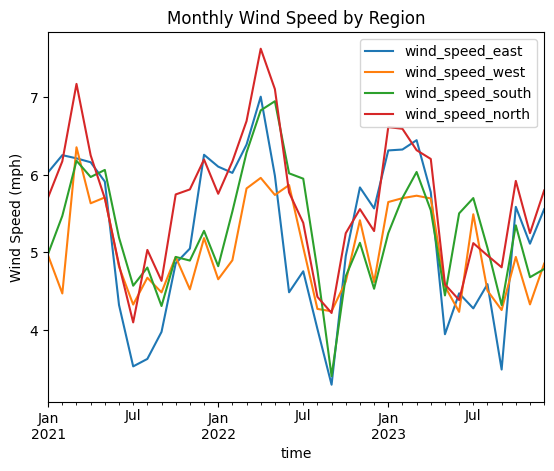

In [10]:
# plot the monthly data of era5
df_era5_monthly[['wind_speed_east', "wind_speed_west", "wind_speed_south", "wind_speed_north"]].plot()
plt.ylabel("Wind Speed (mph)")
plt.title("Monthly Wind Speed by Region")

In [11]:
# pairplot to explore and identify any possible relationships between variables
sns.pairplot(df_era5)

Output hidden; open in https://colab.research.google.com to view.

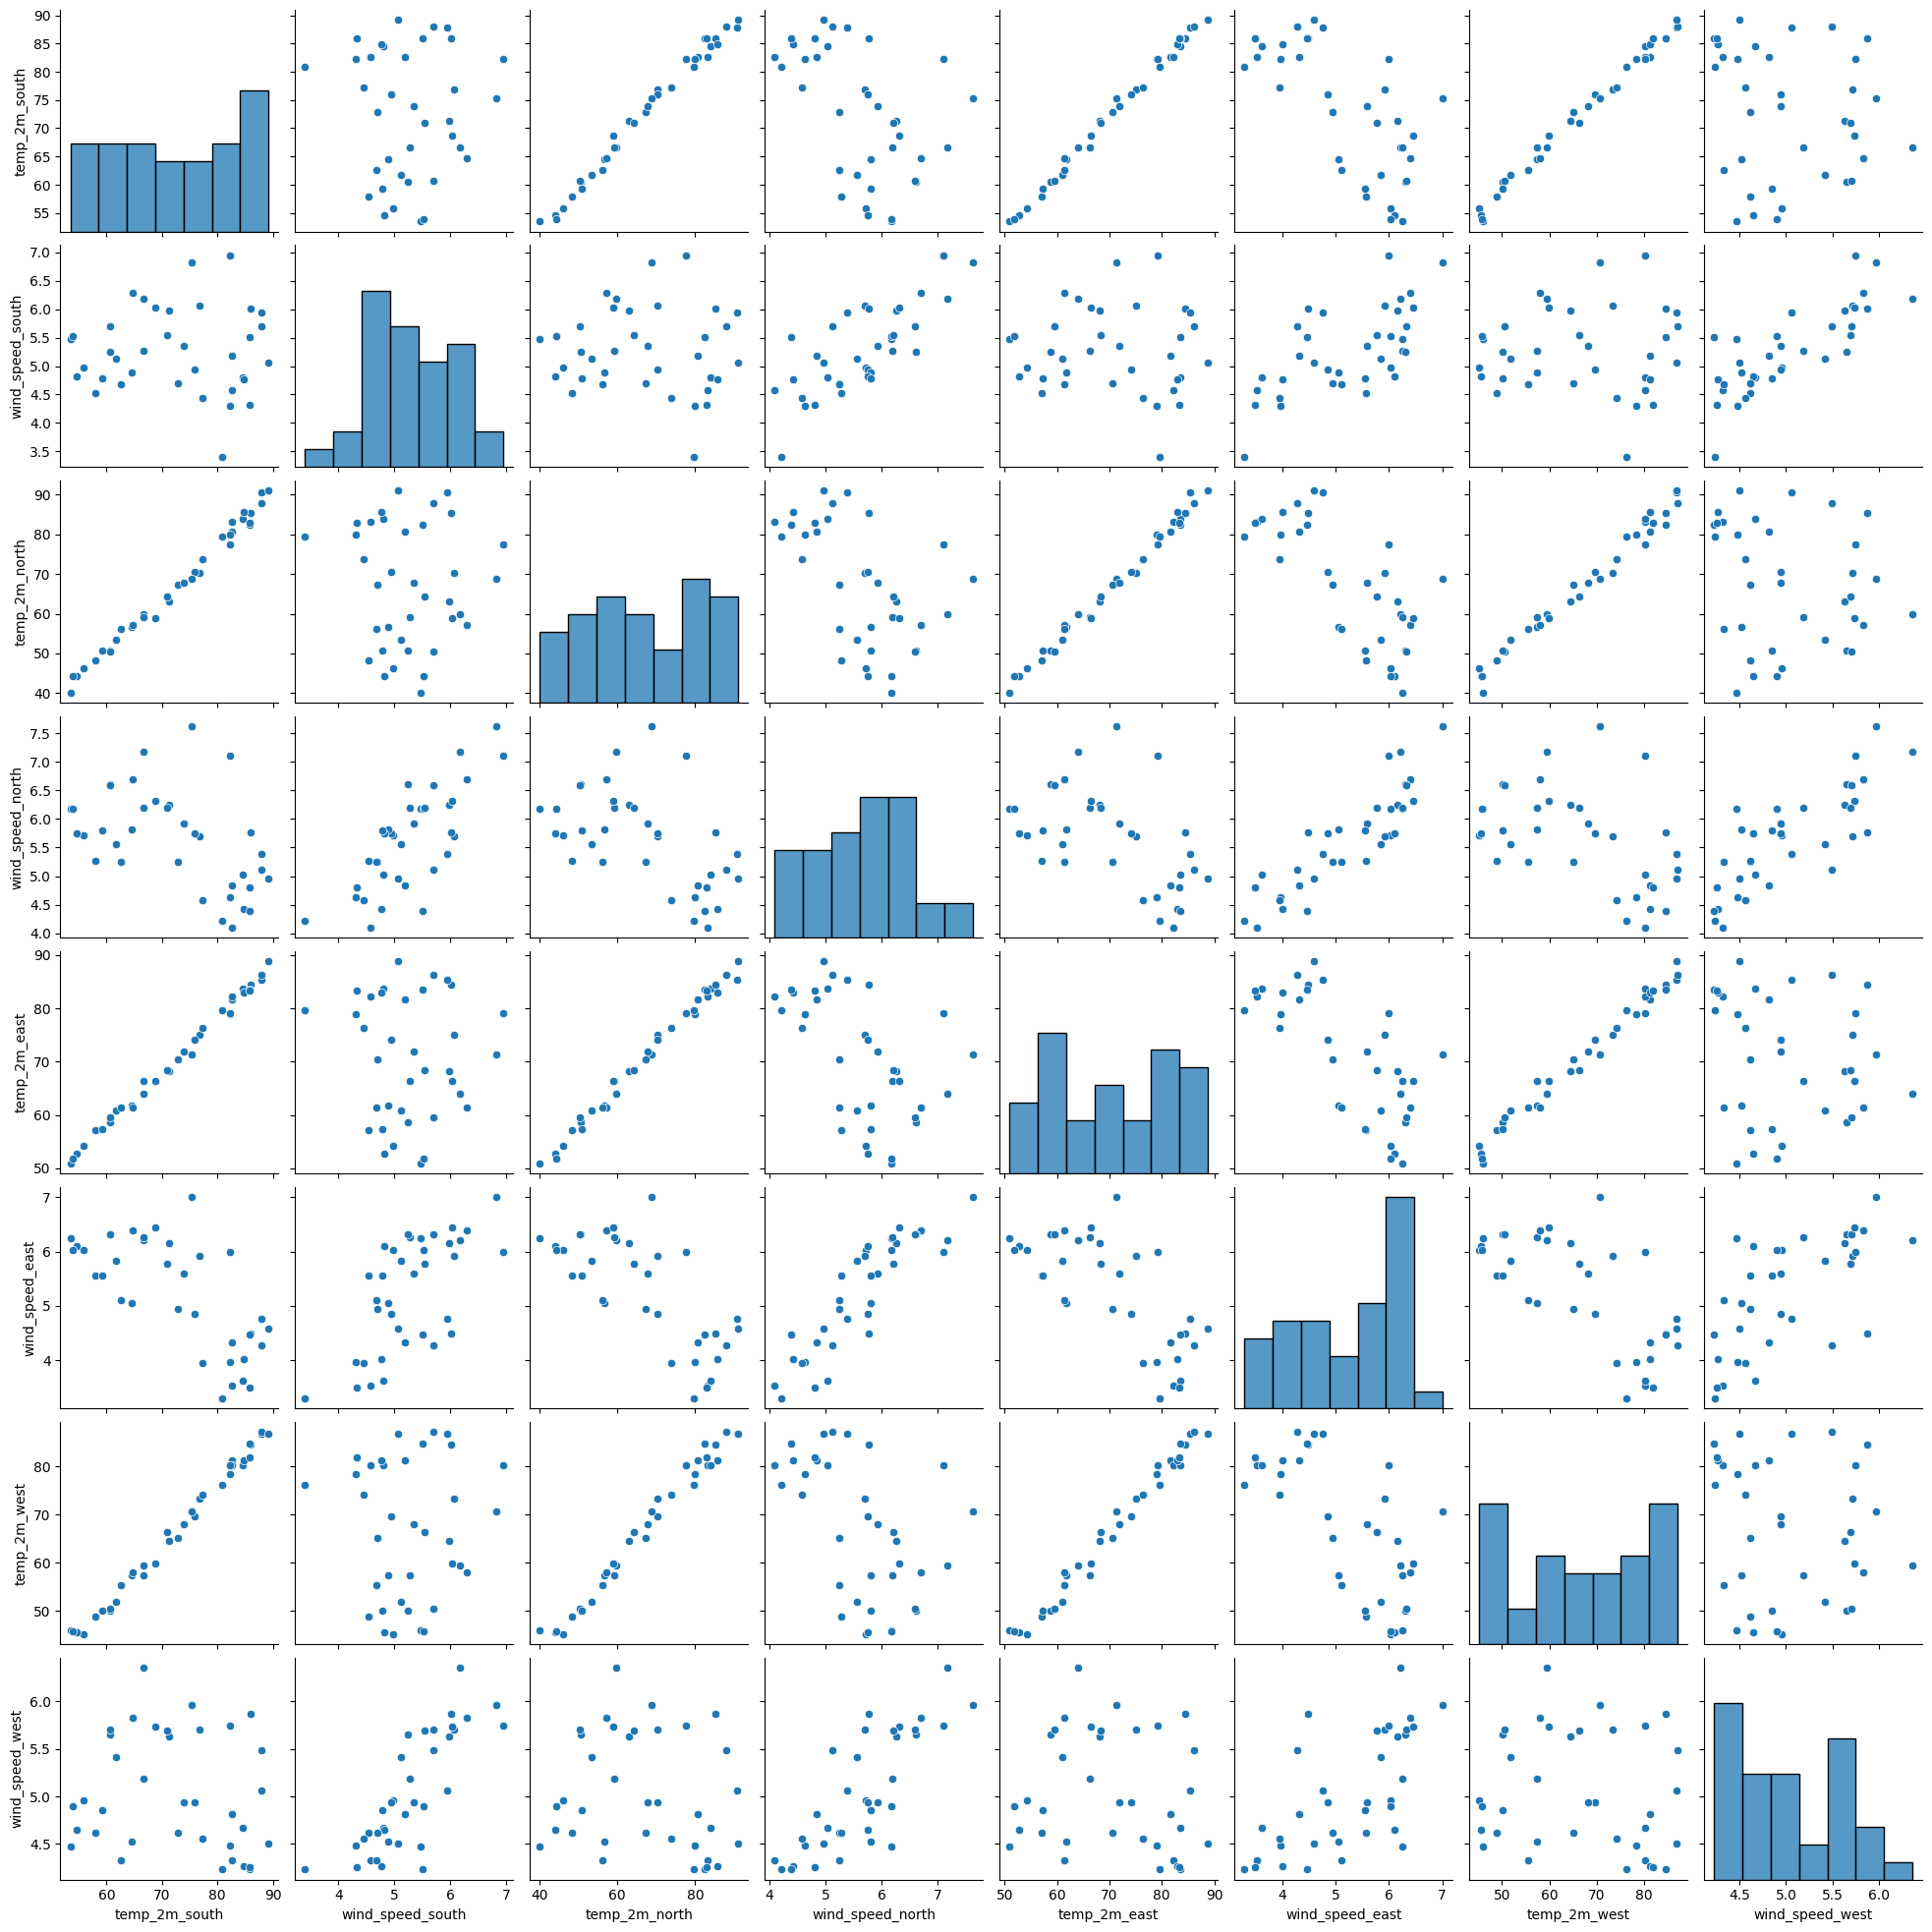

In [12]:
# do the same for the monthly data
sns.pairplot(df_era5_monthly)

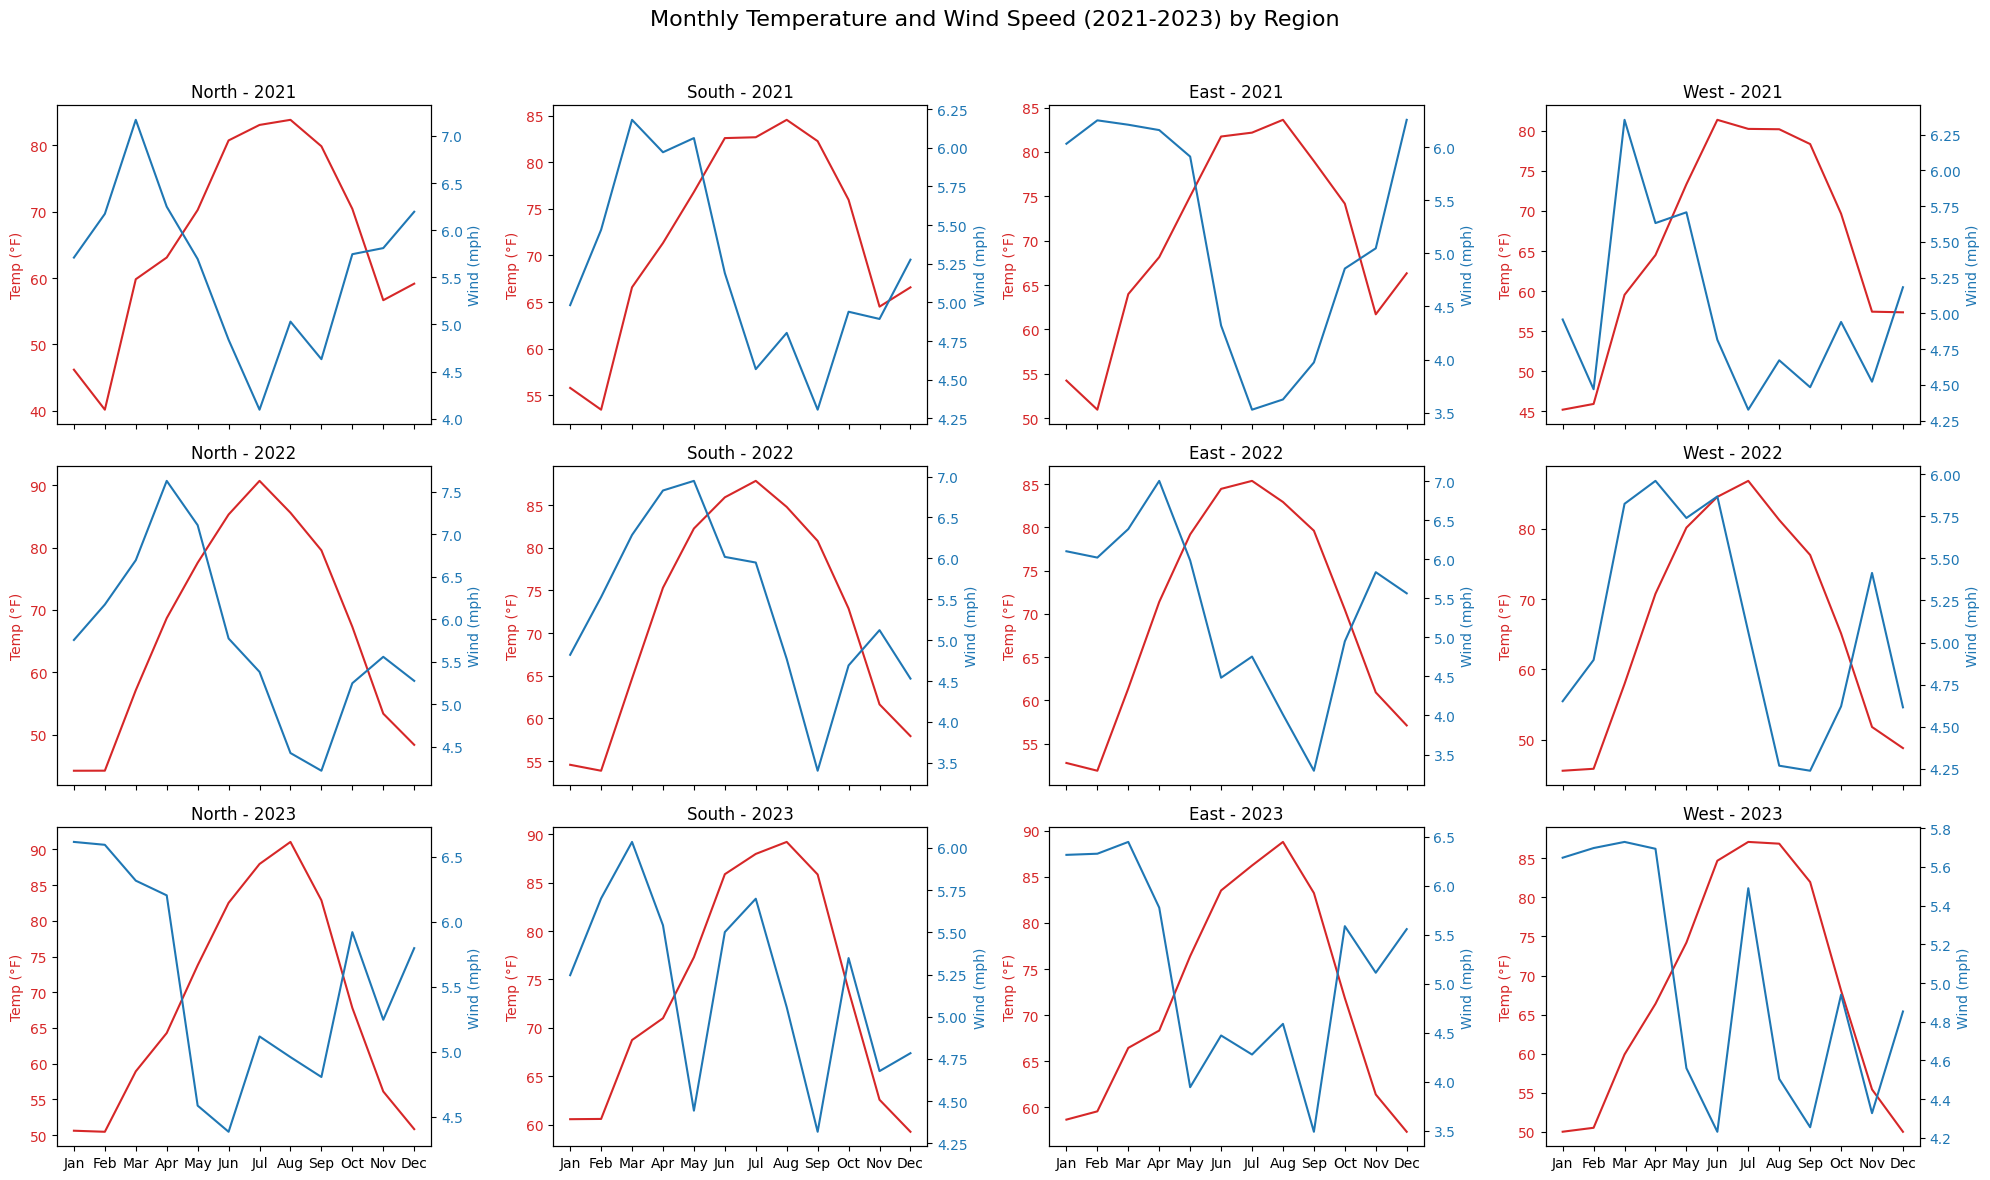

In [14]:
# Plot the spread of temp data and wind data across each region for each year (2021, 2022, 2023)

# Group by year and month and average
df_era5_monthly = df_era5.groupby([df_era5.index.year, df_era5.index.month]).mean()
df_era5_monthly.index.names = ['year', 'month']

# Create a dict of DataFrames, one for each year
years = [2021, 2022, 2023]
region_dfs = {year: df_era5_monthly.loc[year] for year in years}

# Set up plot: 3 rows (years) x 4 columns (regions)
regions = ['north', 'south', 'east', 'west']
fig, axs = plt.subplots(len(years), len(regions), figsize=(20, 12), sharex=True)
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for i, year in enumerate(years):
    for j, region in enumerate(regions):
        ax1 = axs[i, j]
        df = region_dfs[year]

        # Temperature plot
        ax1.plot(df.index, df[f'temp_2m_{region}'], color='tab:red')
        ax1.set_ylabel('Temp (°F)', color='tab:red')
        ax1.tick_params(axis='y', labelcolor='tab:red')
        ax1.set_title(f'{region.capitalize()} - {year}')

        # Twin axis for wind speed
        ax2 = ax1.twinx()
        ax2.plot(df.index, df[f'wind_speed_{region}'], color='tab:blue')
        ax2.set_ylabel('Wind (mph)', color='tab:blue')
        ax2.tick_params(axis='y', labelcolor='tab:blue')

        # Set x-axis to month names
        ax1.set_xticks(range(1, 13))
        if i == len(years) - 1:  # Only bottom row gets labels
            ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
        else:
            ax1.set_xticklabels([])

plt.suptitle("Monthly Temperature and Wind Speed (2021-2023) by Region", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


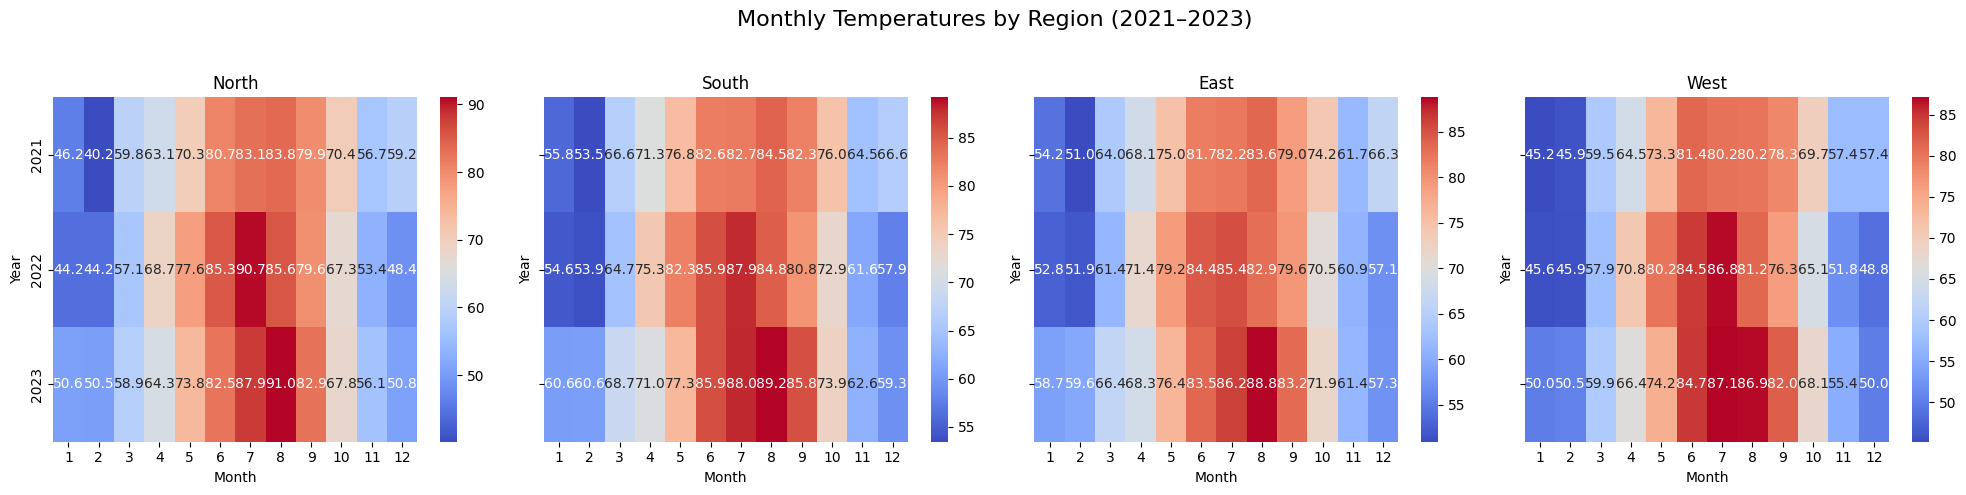

In [15]:
# heat map of the temp differences across regions and time

# Group by year and month and average
df_era5_monthly = df_era5.groupby([df_era5.index.year, df_era5.index.month]).mean()
df_era5_monthly.index.names = ['year', 'month']

# Define temperature regions
regions = ["temp_2m_north", "temp_2m_south", "temp_2m_east", "temp_2m_west"]

# Create subplots for each region
fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

for i, region in enumerate(regions):
    # Pivot the data: rows = year, columns = month
    temp_matrix = df_era5_monthly[region].unstack(level='month')

    # Plot heatmap
    sns.heatmap(temp_matrix, cmap='coolwarm', annot=True, fmt=".1f", ax=axs[i])
    axs[i].set_title(region.replace("temp_2m_", "").capitalize())
    axs[i].set_xlabel("Month")
    axs[i].set_ylabel("Year")

plt.suptitle("Monthly Temperatures by Region (2021–2023)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


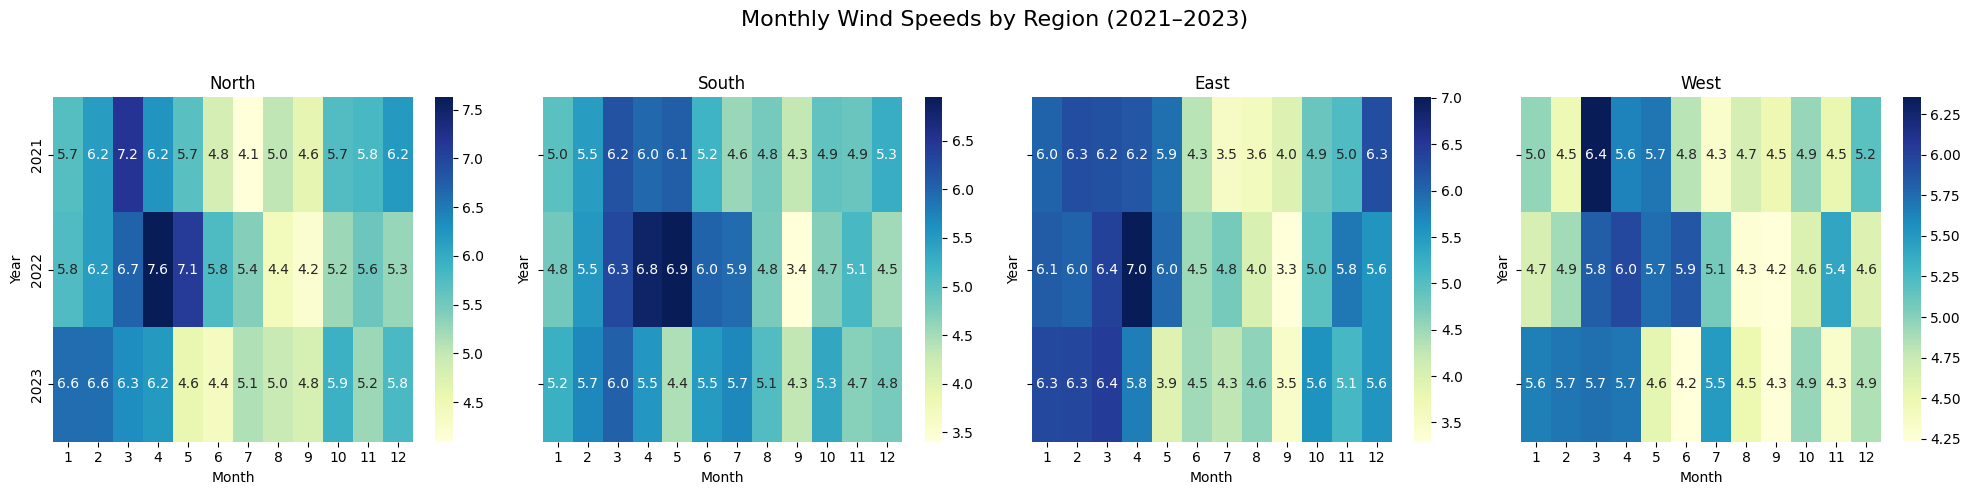

In [16]:
# heat map of the wind speeds across regions and time

# Group by year and month and average
df_era5_monthly = df_era5.groupby([df_era5.index.year, df_era5.index.month]).mean()
df_era5_monthly.index.names = ['year', 'month']

# Define wind speed regions
wind_regions = ["wind_speed_north", "wind_speed_south", "wind_speed_east", "wind_speed_west"]

# Create one heatmap per region
fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

for i, region in enumerate(wind_regions):
    # Pivot: rows = months, columns = years
    wind_matrix = df_era5_monthly[region].unstack(level=0)  # unstack year
    wind_matrix = wind_matrix.T  # Now: years as rows, months as columns

    sns.heatmap(wind_matrix, cmap='YlGnBu', annot=True, fmt=".1f", ax=axs[i])
    axs[i].set_title(region.replace("wind_speed_", "").capitalize())
    axs[i].set_xlabel("Month")
    axs[i].set_ylabel("Year")

plt.suptitle("Monthly Wind Speeds by Region (2021–2023)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


<ipython-input-17-5f88573edee2>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', 12)  # 12 distinct colors for 12 months


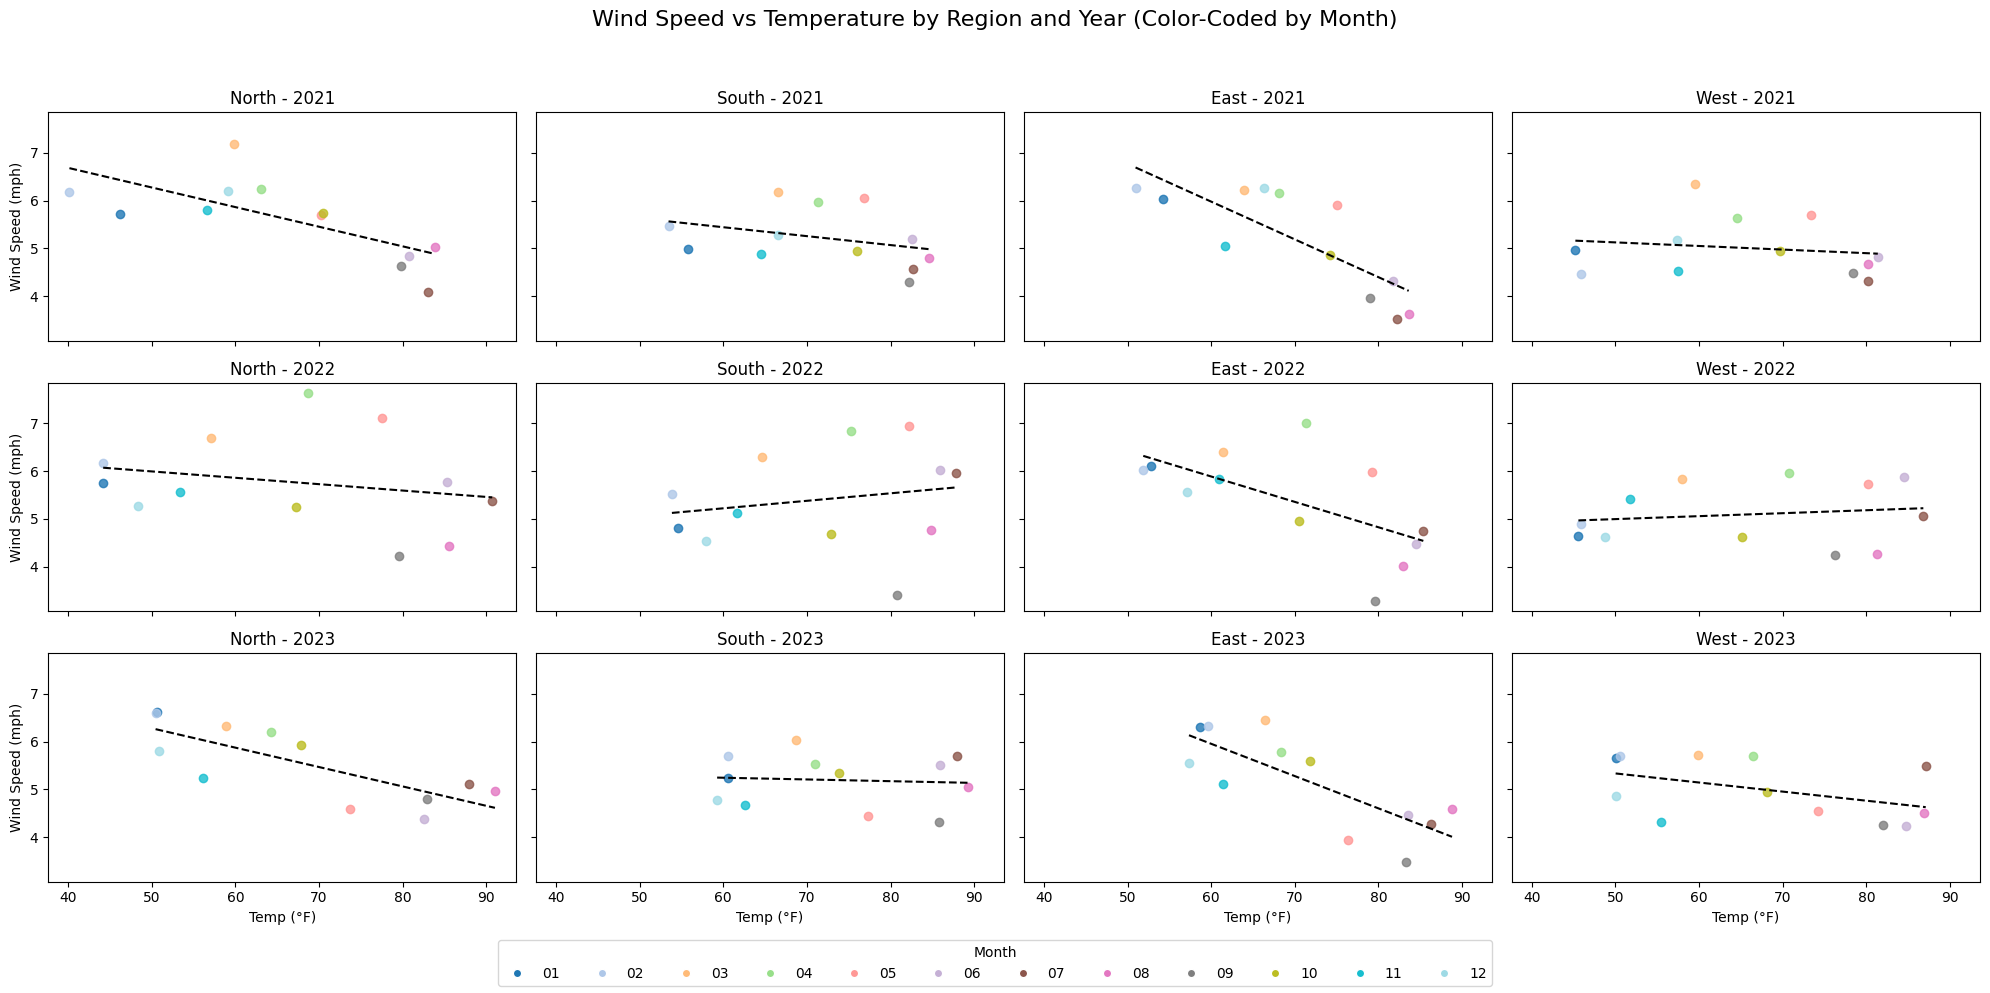

In [17]:
# scatterplot of windspeed vs temp

# Define regions and years
regions = ["north", "south", "east", "west"]
years = [2021, 2022, 2023]

# Set up colormap for months
cmap = plt.cm.get_cmap('tab20', 12)  # 12 distinct colors for 12 months

# Set up subplots: rows = years, columns = regions
fig, axs = plt.subplots(len(years), len(regions), figsize=(20, 10), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Plot scatterplots with regression lines
for i, year in enumerate(years):
    for j, region in enumerate(regions):
        ax = axs[i, j]
        df_year = df_era5_monthly.loc[year].copy()
        months = df_year.index

        x = df_year[f'temp_2m_{region}']
        y = df_year[f'wind_speed_{region}']

        # Color-code by month
        for m in range(1, 13):
            if m in months:
                x_m = x.loc[m]
                y_m = y.loc[m]
                ax.scatter(x_m, y_m, color=cmap(m - 1), label=f'{m:02d}', alpha=0.8)

        # Linear regression line
        coeffs = np.polyfit(x, y, deg=1)
        poly = np.poly1d(coeffs)
        x_line = np.linspace(x.min(), x.max(), 100)
        y_line = poly(x_line)
        ax.plot(x_line, y_line, color='black', linestyle='--', label='Trend')

        ax.set_title(f'{region.capitalize()} - {year}')
        if i == len(years) - 1:
            ax.set_xlabel('Temp (°F)')
        if j == 0:
            ax.set_ylabel('Wind Speed (mph)')

# Create one legend for months
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), label=f'{i+1:02d}') for i in range(12)]
fig.legend(handles, [f'{i+1:02d}' for i in range(12)], title='Month', loc='lower center', ncol=12)

plt.suptitle('Wind Speed vs Temperature by Region and Year (Color-Coded by Month)', fontsize=16)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()


Which region has the highest average wind speed

Which region has the widest variation in wind

Whether there's a seasonal or yearly pattern

If one region consistently shows higher wind speeds

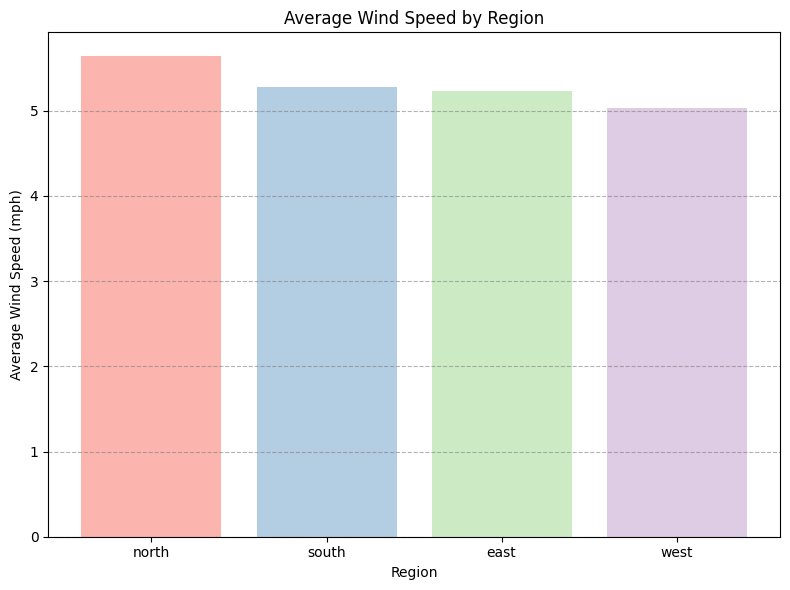

In [18]:
# barplot of avg wind speed by region

# Define regions
regions = ['north', 'south', 'east', 'west']

# Compute average wind speed for each region
avg_wind = [df_era5[f'wind_speed_{region}'].mean() for region in regions]

# Get colors from the 'Pastel1' palette
colors = sns.color_palette("Pastel1", len(regions))

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(regions, avg_wind, color=colors)
plt.xlabel('Region')
plt.ylabel('Average Wind Speed (mph)')
plt.title('Average Wind Speed by Region')
plt.grid(axis='y', linestyle='--', alpha=0.6, color='gray')
plt.tight_layout()
plt.show()


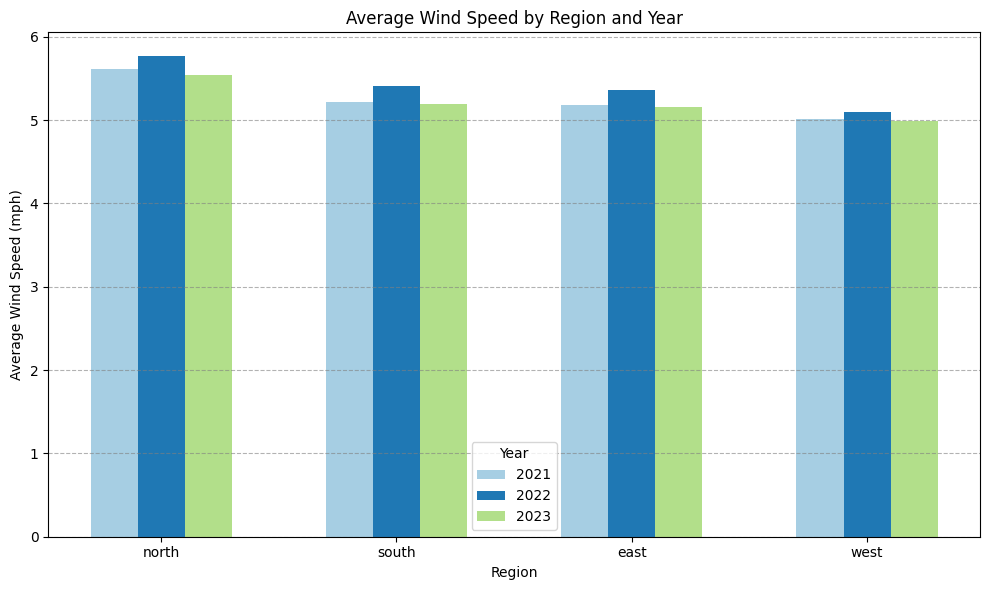

In [19]:
# barplot of avg wind speed by region per year

# Define regions and years
regions = ['north', 'south', 'east', 'west']
years = [2021, 2022, 2023]

# Compute average wind speed for each region per year
avg_wind_by_year = []
for year in years:
    df_year = df_era5[df_era5.index.year == year]
    avg_wind = [df_year[f'wind_speed_{region}'].mean() for region in regions]
    avg_wind_by_year.append(avg_wind)

# Bar width and positioning
bar_width = 0.2
x = np.arange(len(regions))  # x locations for the groups

# Get colors for each year
palette = sns.color_palette("Paired", len(years))

# Plot
plt.figure(figsize=(10, 6))
for i, (avg_wind, year) in enumerate(zip(avg_wind_by_year, years)):
    plt.bar(x + i * bar_width, avg_wind, width=bar_width, label=str(year), color=palette[i])

# Customize x-axis
plt.xticks(x + bar_width, regions)
plt.xlabel('Region')
plt.ylabel('Average Wind Speed (mph)')
plt.title('Average Wind Speed by Region and Year')
plt.grid(axis='y', linestyle='--', alpha=0.6, color='gray')
plt.legend(title='Year')
plt.tight_layout()
plt.show()


wind_speed_south: Peak hour = 4:00, Avg = 6.41 m/s
wind_speed_north: Peak hour = 5:00, Avg = 6.70 m/s
wind_speed_east: Peak hour = 4:00, Avg = 5.91 m/s
wind_speed_west: Peak hour = 5:00, Avg = 6.01 m/s


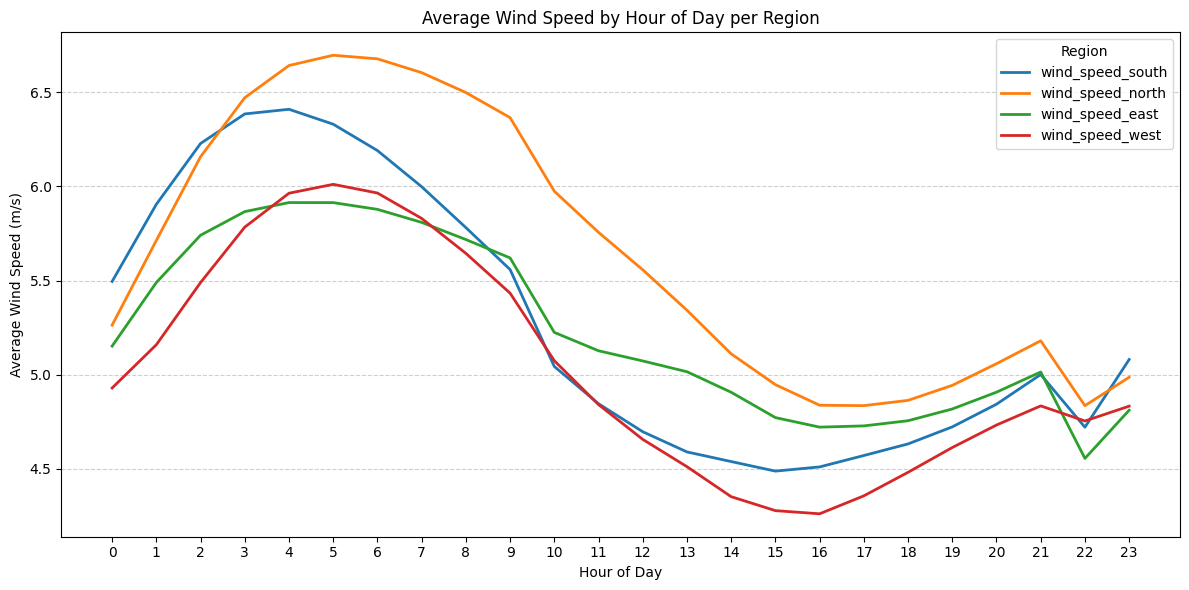

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Add hour column
df_era5['hour'] = df_era5.index.hour

# Select wind speed columns
wind_speed_cols = ['wind_speed_south', 'wind_speed_north', 'wind_speed_east', 'wind_speed_west']

# Group by hour and calculate the average wind speed
avg_wind_speed_by_hour = df_era5.groupby('hour')[wind_speed_cols].mean()

# Find peak hour and value for each region
peak_hours = avg_wind_speed_by_hour.idxmax()
peak_values = avg_wind_speed_by_hour.max()

# Print peak info
for col in wind_speed_cols:
    print(f"{col}: Peak hour = {peak_hours[col]}:00, Avg = {peak_values[col]:.2f} m/s")

# Plot
avg_wind_speed_by_hour.plot(figsize=(12, 6), linewidth=2)
plt.title('Average Wind Speed by Hour of Day per Region')
plt.xlabel('Hour of Day')
plt.ylabel('Average Wind Speed (m/s)')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Region')
plt.tight_layout()
plt.show()
